<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей.-Логистическая-регрессия" data-toc-modified-id="Обучение-моделей.-Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей. Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Произведем-взвешивание-классов" data-toc-modified-id="Произведем-взвешивание-классов-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Произведем взвешивание классов</a></span></li><li><span><a href="#с-увеличением(upsample)-выборки" data-toc-modified-id="с-увеличением(upsample)-выборки-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>с увеличением(upsample) выборки</a></span></li><li><span><a href="#уменьшением(downsample)-выборки" data-toc-modified-id="уменьшением(downsample)-выборки-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>уменьшением(downsample) выборки</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


Найдены пропуски в столбце "Tenure", их количество составляет 9% от общего числа их можно удалить или заменить медианным значением. Воспользуемся вторым вариантом.
Пропуски в данном столбце могли появиться из-за технических ошибок, например, при оформление клиента не сохранилась текущая дата.

In [5]:
df['Tenure'] = df['Tenure']. fillna(df['Tenure'].median())
df['Tenure'].describe()

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df['CustomerId'].unique().shape[0]

10000

Дубликаты не обнаружены.

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df_new=df.drop(['RowNumber','CustomerId', 'Surname'],axis=1)
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Переведем категориальные признаки в численные с помощью техники ОНЕ

In [10]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Вывод:** после исследования и преобразования данных мы заменили пропуски в столбце "Tenure", что бы избежать дамми ловушек мы заменили столбцы "Geography" и "Gender" на новые столбцы, характеризующие их по классам.

**Разобьем данные на выборки**

Разделим исходные данные на обучающую, валидационную и тестовую выборки. в итоге должны получить соотношение 60/20/20

Разобьем выборки на 60% обучающую и 40% валидационную

In [11]:
features = df_new.drop('Exited', axis=1) # извлекаем признак
target = df_new['Exited'] #цизвлекаем нулевой признак

features_train, features_test, target_train, target_test  = (
    train_test_split(features, target, test_size=0.4, random_state=12345)
)

Валидационную на тестовую и валидацонную в соотношении 50/50

Проверка:

In [13]:
print(f'тренировочная {features_train.shape[0] / len(df_new):.1%}')
print(f'валидационная {features_valid.shape[0] / len(df_new):.1%}')
print(f'тестовая {features_test.shape[0] / len(df_new):.1%}')

тренировочная 60.0%
валидационная 20.0%
тестовая 20.0%


**Вывод:** данные поделены корректно.

**Проведем масштабирование признаков**

In [14]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None

In [15]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [16]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


In [17]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


Масштабирование данных произведенно. Теперь алгоритмам лече обучать модели, ведь признаки одного масштаба.

## Исследование задачи

0    0.800667
1    0.199333
Name: Exited, dtype: float64

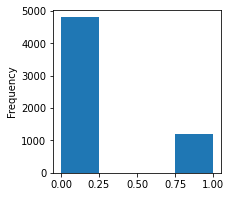

In [18]:
# Построим диаграмму баланса классов
target_train.plot(kind ='hist', bins=4, figsize=(3,3))
target_train.value_counts(normalize = 1)

Из данной диаграмму видно, что присутствует дисбаланс классов. Отрицательных ответов почти в 4 раза больше положительных.

### Обучение моделей. Логистическая регрессия

In [19]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=10000) 
model.fit(features_train,target_train) # обучите модель на тренировочной выборке
accuracy = model.score(features_valid, target_valid)
prediction = model.predict(features_valid)
#auc_roc = roc_auc_score(target_valid,probabilities_one_valid)

print(
    "Качество:", accuracy, 
    "\nПолнота:" , recall_score(target_valid, prediction), 
    "\nТочность", precision_score(target_valid, prediction),
    "\nF1-мера", f1_score(target_valid, prediction))

Качество: 0.802 
Полнота: 0.23444976076555024 
Точность 0.5632183908045977 
F1-мера 0.33108108108108103


### Дерево решений

In [20]:
best_model = None
best_depth = 0
best_accuracy = 0
best_auc_roc = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)  # инициализируйте модель 
    model.fit(features_train,target_train) # обучите модель на тренировочной выборке
    accuracy = model.score(features_valid, target_valid)
    prediction = model.predict(features_valid)
    #auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_depth = depth
        #best_auc_roc = auc_roc

print(
    "Глубина дерева:",best_depth, 
    "\nКачество:", best_accuracy, 
    "\nПолнота:" , recall_score(target_valid, prediction), 
    "\nТочность", precision_score(target_valid, prediction),
    "\nF1-мера", f1_score(target_valid, prediction),
     '\nauc_roc', best_auc_roc)

Глубина дерева: 5 
Качество: 0.853 
Полнота: 0.4138755980861244 
Точность 0.7792792792792793 
F1-мера 0.5406249999999999


### Случайный лес

In [21]:
best_model = None
best_est = 0
best_depth = 0
best_accuracy = 0
mss=2
for est in range(1,20,1):
    for depth in range(1,11):
        for mss in range(2,6):
            model = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth,min_samples_split=mss)
            model.fit(features_train,target_train)
            accuracy = model.score(features_valid, target_valid) 
            prediction = model.predict(features_valid)
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
            if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_depth = depth
                    best_est = est
                    best_mss = mss

print("Глубина дерева:", best_depth, 
      "\nКоличество деревьев:", best_est, 
      '\nМинимальное количество выборок внутреннего узла:', best_mss, 
      "\nКачество:", best_accuracy,
      "\nПолнота:" , recall_score(target_valid, prediction), 
      "\nТочность", precision_score(target_valid, prediction),
      "\nF1-мера",  f1_score(target_valid, prediction), 
     '\nauc_roc', auc_roc)



Глубина дерева: 9 
Количество деревьев: 12 
Минимальное количество выборок внутреннего узла: 3 
Качество: 0.8655 
Полнота: 0.430622009569378 
Точность 0.7894736842105263 
F1-мера 0.5572755417956657 
auc_roc 0.844547511175364


**Вывод:** 
Заметим, что во всех моделях F1-мера < 5,6. Лучшая модель - Случайный лес, Качество: 0.866, F1-мера 0.556. C параметтрами: depth = 10, est = 11
C учетом дисбаланса модели показали хорошее качество(accuracy), но F1-мера не удовлетворяет нашим результатм. Для улучшения значений данных метрик произведем борьбу с дисбалансом 

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

confusion_matrix(target_test, predictions, labels=clf.classes_)

NameError: name 'clf' is not defined

## Борьба с дисбалансом

Рассмотрим три возможным варианты "борьбы" на примере с моделью "RandomForestClassifier"

#### Произведем взвешивание классов

In [22]:
best_model = RandomForestClassifier(
    random_state=12345, max_depth = 10, n_estimators = 11, min_samples_split=2, class_weight='balanced')

best_model.fit(features_train, target_train) 
predictions = best_model.predict(features_valid)
result = f1_score(target_valid, predictions)

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("\nКачество:", best_model.score(features_valid, target_valid),
      "\nПолнота:" , recall_score(target_valid, prediction), 
      "\nТочность", precision_score(target_valid, prediction),
      "\nF1-мера",  result,
      '\nauc_roc', auc_roc
     )


Качество: 0.831 
Полнота: 0.430622009569378 
Точность 0.7894736842105263 
F1-мера 0.5867970660146699 
auc_roc 0.838643017439012


 Напишем две функции: 
#### с увеличением(upsample) выборки


In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


Качество: 0.811 
Полнота: 0.6698564593301436 
Точность 0.5384615384615384 
F1-мера 0.5970149253731343 
auc_roc 0.8365833630738148


0    0.501043
1    0.498957
Name: Exited, dtype: float64

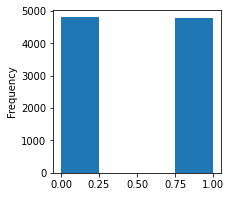

In [24]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(
    random_state=12345, max_depth = 10, n_estimators = 11, min_samples_split=2)

model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("\nКачество:", model.score(features_valid, target_valid),
      "\nПолнота:" , recall_score(target_valid, predicted_valid), 
      "\nТочность", precision_score(target_valid, predicted_valid),
      "\nF1-мера",  f1_score(target_valid, predicted_valid),'\nauc_roc', auc_roc
     )

target_upsampled.plot(kind ='hist', bins=4, figsize=(3,3))
target_upsampled.value_counts(normalize = 1)

#### уменьшением(downsample) выборки

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat( [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat( [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


Качество: 0.8005 
Полнота: 0.69377990430622 
Точность 0.5169340463458111 
F1-мера 0.5924412665985701 
auc_roc 0.8325736908643291


0    0.546454
1    0.453546
Name: Exited, dtype: float64

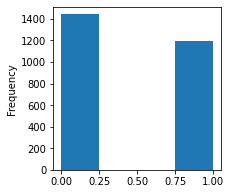

In [26]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

model =  RandomForestClassifier(
    random_state=12345, max_depth = 10, n_estimators = 11, min_samples_split=2)

model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid) 

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("\nКачество:", model.score(features_valid, target_valid),
      "\nПолнота:" , recall_score(target_valid, predicted_valid), 
      "\nТочность", precision_score(target_valid, predicted_valid),
      "\nF1-мера",  f1_score(target_valid, predicted_valid),'\nauc_roc', auc_roc
     )

target_downsampled.plot(kind ='hist', bins=4, figsize=(3,3))
target_downsampled.value_counts(normalize = 1)

Показатели F1-меры увеличились до необходимого нам значения. Остальные показатели критично не изменились и остались в норме

## Тестирование модели

Проверяем наилучшую модель на тестовых данных модель 

In [27]:
model= RandomForestClassifier(
    random_state=12345, max_depth = 10, n_estimators = 11,min_samples_split=2, class_weight='balanced')

model.fit(features_train, target_train) 
predictions = model.predict(features_valid)


probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)

print("\nКачество:", model.score(features_test, target_test),
      "\nF1-мера",   f1_score(target_valid, predictions),
      '\nauc_roc', auc_roc)


Качество: 0.8155 
F1-мера 0.5867970660146699 
auc_roc 0.8290414363688423


**Вывод** Показатели на тестовой выборке: 
<blockquote> 
<p>Качество: 0.833 
<p>F1-мера 0.594272076372315 > 0.59
<p>auc_roc 0.8399862983100748

## Общий вывод:

**Качество (accuracy) - это самый важный критерий для бизнеса: чем выше качество, тем больше прибыли приносит продукт.**

**Метрика auc_roc - метрика качества, которая изменяется от 0 до 1, чем больше значение, тем луучше качество модели**

**F1-мера среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1**

<ul><li>До обрабтоки данных у нас были пропуски в столбце, которые мы заменили на медианное значения. Так же мы преобразовали категориальные признаки в численные. Разбили данные на обучающую, валидационную и тестовую выборки. </li> 
<li>При первоначальной работе с данными у нас наблюдался дисбаланс классов. Отрицательных ответов было почти в 4 раза больше положительных. </li>

<li>После обучения с учетом дисбаланса  получились следующие значения
 <blockquote>       <p><li>model = LogisticRegression; Качество: 0.802 ;F1-мера 0.331; auc_roc 0.7588
        <p><li> model = DecisionTreeClassifier; Качество: 0.853 ;F1-мера 0.5406; auc_roc 0.822 
        <p><li>model = RandomForestClassifier; Качество: 0.866;F1-мера 0.556; auc_roc 0.845
 </blockquote> 
<li> Во всех моделях F1-мера < 5,6, Можно выделить модель RandomForestClassifier (Глубина дерева: 10 
Количество деревьев: 11)           
            
<li> Произвели борьбу с дисбалансом. На выбор есть три способа(взвесить веса, уменьшить или увеличить выборки)       Анализировать будем по данным лучшей модели с учетом дисбаланса. (RandomForestClassifier)
    
<blockquote>    
<li> Результаты после взвешивания:   Качество: 0.83;F1-мера 0.59427; auc_roc 0.834
<li> Результат после увеличения выборки: Качество: 0.8125;F1-мера 0.595469;auc_roc 0.8381
<li> Результаты с уменьшением выборки:Качество: 0.7995; F1-мера 0.593718;auc_roc 0.8371
 </blockquote>          
<li> После борьбы с дисбалансом можем заметить, что у нас незначительно снизилось качество модели, но зато F1 мера выросла до желаемых 0,59. Метрика auc_roc изменилась лишь на сотые части. Исходя из этого можем сделать вывод, что борьба с дисбалансом помогла нам повысить F1-меру. Максимальный результат был после увеличения выборки - F1-мера - 0.595469. 
 </li>   
     
*Рекомендации: так как у модели LogisticRegression качество хуже, следует использовать ее в последнюю очередь или не использовать. А предпочтение отдать - RandomForestClassifier*